In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
path = "./ex2"
dataset = pd.read_csv( os.path.join(path,"ex2data1.txt"), header=None )
dataset.columns=["exam1","exam2","decisions"]

In [3]:
dataset.head()

,exam1,exam2,decisions
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#extract dataset into featureset and target
featureset = dataset.values[:,:2]
target = dataset.values[:,2].reshape(-1,1)

In [5]:
# display the shape of featureset and target
print(featureset.shape)
print(target.shape)

(100, 2)
(100, 1)


In [6]:
#visulaize the dataset
from matplotlib import pyplot as plt


Text(0.5, 1.0, 'Data Visulizations')

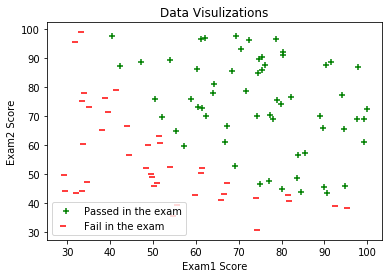

In [7]:
zeros = target==0
ones = target==1
plt.scatter( featureset[ ones[:,0], 0 ], featureset[ ones[:,0], 1 ], marker='+', color='g' )
plt.scatter( featureset[ zeros[:,0], 0 ], featureset[zeros[:,0],1] , marker=0, color='r')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(["Passed in the exam","Fail in the exam"])
plt.title("Data Visulizations")

### Logistic Regression
Logistic Regression is a classification problem.
Some popular classification problem is spam classification, Classifying online transaction, tumour classification etc.
In classificatin probelm we try to predict a variable y which is taking two values either zero or one, spam or non-spam, fraudulent or not fraudulent, malignant or benign. Zero is also known as negative and one as positive.
> Logistic Regression is a classification problem where label **y** is discrete value.

> there is this intuition that a negative class is conveying the absence of something like the absence of a malignant tumor. Whereas one the positive class is conveying the presence of something that we may be looking for

#### Why Linear Regression shouldn't use for classification problem?
- Most two important reason is 
 1. Predicted Values are continuous not probabilistic
 2. Sensitive to imbalance data
- Details Reading
    1. [Why not approach classification through regression?](https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression)
    2. [Why Linear Regression is not suitable for Classification](https://jinglescode.github.io/datascience/2019/05/07/why-linear-regression-is-not-suitable-for-classification/)
    3. [Why Linear Regression is not fit for Classification Problem](https://medium.com/datadriveninvestor/why-linear-regression-is-not-fit-for-classification-problem-ccf162147361)

For Logistice Regression, our hypothesis should satisfy the property which is predictions should be between $0$ and $1$.

In linear regression hypothesis is $h_\theta(x)=\theta^Tx$.<br>
And Hypothesis of the Logistic Regression is

$$h_\theta(x)=g(\theta^Tx)$$
$$\theta^Tx=\theta_0+\theta_1x_1$$
Where, $g$ is the sigmoid function(also known as logistic function).
$$Sigmoid function, g(z) = \frac{1}{1+e^{-z}}$$
We can write like this
$$h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

So what we need to do is, given the hypothesis $h_\theta(x)$ and we will find the value for parameters $\theta$ to fit the model based on training data. To predict we will use the selected value for parameters $\theta$.

Let's we get the ouput from the $h_\theta(x)$ and which is a number. We are goning to treate this number as the probability of $y=1 or y=0$ for input $x$.
The LR can express as probability of the default class.
Lets we want to decide the male or female based on their heights. So we can write as,
$$P(sex=male|height)$$
Generally we try to find $P(x)$ for class $y=1$ where featureset $x$ is given,
$$P(x)=P(y=1|x)$$
and we transformed the $P(x)$ into binary value 0 or 1 through the sigmoid function.

In [2]:

# implementation of sigmoid function
def sigmoid(z):
    '''
    z: should be an numpy array
    '''
    return 1/(1+np.exp(-z))

#### Cost function of the Logistic Regression
$$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^m[-y^i \log(h_\theta(x^i))-(1-y^i)\log(1-h_\theta(x^i))]$$
#### Gradient of the Cost function
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x^i)-y^i)x^i_j$$

In [9]:
def compute_cost(X, y, theta):
    m = y.shape[0] #number of data points
    
    # compute hypothesis
    hx = sigmoid( np.dot(X,theta.T) ) 
    
    # compute cost
    cost = (1/m) * np.sum( ( -y*np.log(hx) - (1-y)*np.log(1-hx) ) ,axis=0 )
    
    # calculate difference between predictions and orginal value
    grad = (1/m)*np.dot(X.T,hx-y).T
    
    return cost[0], grad
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [10]:
y = target
m=y.shape[0]
X,_,_ = featureNormalization(featureset)
X = np.append( np.ones((m,1)), X, axis=1 )
theta = np.zeros((1,X.shape[1]))
cost,grad = compute_cost(X,y,theta)
print(cost)
print(grad)
print("==================")
cost, grad = compute_cost(X, y, np.array([-24,0.2, 0.2]).reshape(1,-1))
print(cost)
print(grad)

0.6931471805599453
[[-0.1        -0.28122914 -0.25098615]]
14.293556943786108
[[-0.6        -0.28122914 -0.25098615]]


In [11]:
def gradient_descent(X, y, theta, learning_rate, iterations=400):
    costs = []
    for itr in range(iterations):
        cost, grad = compute_cost(X, y, theta)
        theta = theta - learning_rate*grad
        costs.append(cost)
    
    return costs, theta
        

In [12]:
alphas = [0.01, 0.05, 0.1, 0.5, 1.0]
parameters =[]
init_theta = np.zeros((1,X.shape[1]))
for alpha in alphas:
    costs,theta = gradient_descent( X, y, init_theta, alpha )
    parameters.append({
        "costs":costs,
        "alpha":alpha,
        "theta":theta
    })

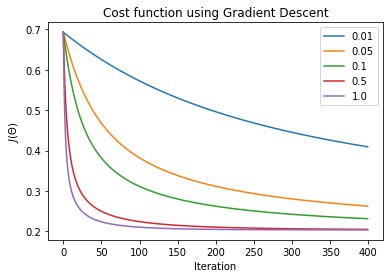

In [17]:
for param in parameters:
    plt.plot(param["costs"])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend(alphas)
plt.show()

In [18]:
optimal_parameters={}
for params in parameters:
    if(params["alpha"]==1.0):
        optimal_parameters["theta"] = params['theta']
        optimal_parameters['alpha'] = 1.0
        optimal_parameters['cost']=params['costs'][-1]


In [20]:
predictions = sigmoid(np.dot(X,optimal_parameters['theta'].T))

In [26]:
predictions= predictions>=0.5


In [37]:
Xboundary = np.array([np.min(X[:,1]), np.max(X[:,1])]).reshape(-1,1)
Theta = optimal_parameters['theta'].flatten()
yboundary = -(Theta[0]+Theta[1]*Xboundary)/Theta[2]

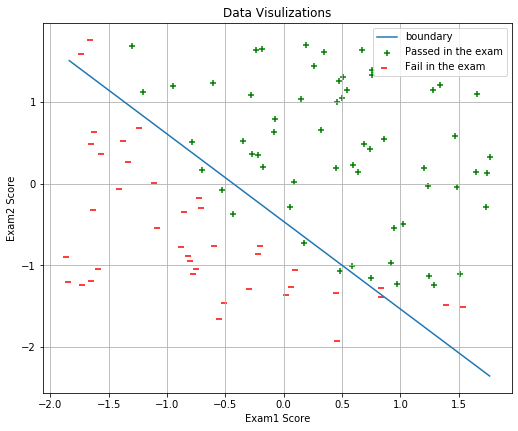

In [44]:
plt.figure(figsize=(8.4, 6.8))
plt.scatter( X[ ones[:,0], 1 ], X[ ones[:,0], 2 ], marker='+', color='g' )
plt.scatter( X[ zeros[:,0], 1 ], X[zeros[:,0],2] , marker=0, color='r')
plt.plot(Xboundary,yboundary)
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(["boundary","Passed in the exam","Fail in the exam"])
plt.title("Data Visulizations")
plt.grid()
plt.show()


# Regularized Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load Dataset
path = "./ex2"
dataset = pd.read_csv(os.path.join(path,'ex2data2.txt'),header=None)
dataset.columns = ["test_1","test_2","result"]

In [3]:
# get the input feature and target feature
featureset = dataset.values[:,:2]
target = dataset.values[:,2].reshape(-1,1)
m = target.shape[0] # number of data points

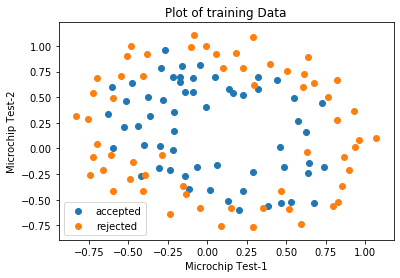

In [4]:
# Visualize the data
ones = target==1
zeros = target==0
plt.scatter(featureset[ones[:,0],0], featureset[ones[:,0],1])
plt.scatter(featureset[zeros[:,0],0], featureset[zeros[:,0],1])
plt.xlabel("Microchip Test-1")
plt.ylabel("Microchip Test-2")
plt.title("Plot of training Data")
plt.legend(["accepted",'rejected'])

In [5]:
# implementation of sigmoid function
def sigmoid(z):
    '''
    z: should be an numpy array
    '''
    return 1/(1+np.exp(-z))

In [6]:
def feature_mapping(X1,X2):
    degree = 7
    mapped_data = np.ones((X1.shape[0],1))
    for i in range(1,degree):
        for j in range(i+1):
            mm = (np.power(X1,i-j)*np.power(X2,j)).reshape(-1,1)
            mapped_data = np.append(mapped_data,mm,axis=1)
#     print(mapped_data.shape)
    return mapped_data


In [15]:
def compute_regularized_cost( thetas, X, y, _lambda):
    m = y.shape[0]
#     print("thetas shape: ",thetas.shape)
#     print("X shape: ",X.shape)
    hx = sigmoid( np.dot(X, thetas.T) )
    error = -y*np.log(hx) - (1-y)*np.log(1-hx)    
    cost = np.sum(error, axis=0)/m    
    reg_term = _lambda/(2*m) * np.sum( np.power(thetas,2), axis=1 )
    print("cost shape: ",reg_term.shape)
    reg_cost = cost + reg_term
    
    grad_0 = np.dot(X[:,0].T,(hx-y))/m
    grad_1 = np.dot(X[:,1:].T,(hx-y))/m
#     print(grad_0.shape)
#     print(grad_1.shape)
    grad   = np.append(grad_0, grad_1.flatten()).reshape(1,-1)
#     print("grad shape: ",reg_cost.shape)
    return reg_cost[0], grad

In [8]:
def gradient_descent(X, y, thetas, alpha, _lambda, iterations):
    costs = []
    for i in range(iterations):
        cost, grad = compute_regularized_cost( X, y, thetas, _lambda )
        thetas = thetas - alpha*grad
#         print("\nThetas shape: ",thetas.shape)  
        costs.append(cost)
    return costs, thetas


In [12]:
X = feature_mapping( featureset[:,0], featureset[:,1] )
y = target
theta = np.zeros( (1,X.shape[1]) )
iterations = 400
alpha = 0.2
_lambda = 1
# costs, thetas = gradient_descent(X, y, theta, alpha, _lambda, iterations)
cost, thetas = compute_regularized_cost(theta, X, y, _lambda)

cost shape:  (1,)


In [16]:
cost, thetas = compute_regularized_cost(np.ones( (1,X.shape[1]) ), X, y, 10)
print(cost)
print(thetas)

cost shape:  (1,)
3.2068822129709416
[[ 3.46045074e-01  7.66061566e-02  1.10049993e-01  1.42117020e-01
   7.43991239e-03  1.59639814e-01  5.86463603e-02  2.36959523e-02
   1.75686317e-02  9.87226948e-02  8.87842709e-02  2.50975573e-03
   3.34819937e-02  1.09754196e-03  1.15203182e-01  5.04807645e-02
   1.02295113e-02  8.81865218e-03  1.50520786e-02  6.65581097e-03
   9.01066541e-02  6.48086550e-02  2.03989264e-03  1.42310951e-02
   5.73747746e-04  1.71609001e-02 -2.43784101e-04  9.75374635e-02]]


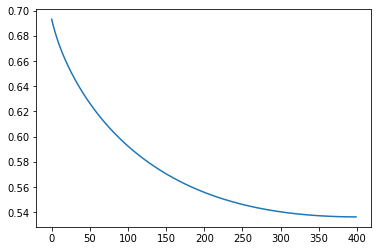

In [97]:
plt.plot(costs)

In [98]:
from scipy import optimize

In [118]:
X = feature_mapping( featureset[:,0], featureset[:,1] )
y = target
theta = np.zeros( (1,X.shape[1]) )
option = {'maxiter':100}
result = optimize.minimize(compute_regularized_cost,theta,(X,y,_lambda), jac=True,method='TNC',options=option )

In [119]:
result

     fun: 0.5800019324061126
     jac: array([[ 7.00973031e-03,  3.14102867e-03,  1.99017198e-02,
         1.08031115e-02,  5.40186744e-03,  2.50818232e-02,
         2.92110273e-03,  4.66463247e-03,  9.12787759e-04,
         1.88999600e-02,  8.44516740e-03,  9.58696036e-05,
         5.08323052e-03,  7.95341246e-04,  2.09734564e-02,
         3.77440533e-03,  1.59258728e-03,  1.05356115e-05,
         3.35026024e-03,  4.87245808e-04,  1.61642645e-02,
         6.50986737e-03, -2.79204911e-04,  2.02093426e-03,
        -3.80352118e-04,  3.18884379e-03, -1.73784280e-04,
         1.70542369e-02]])
 message: 'Linear search failed'
    nfev: 85
     nit: 1
  status: 4
 success: False
       x: array([ 1.60696221,  1.15602092,  1.96230683, -3.0506493 , -1.65703113,
       -1.91904876,  0.57020869, -0.68153351, -0.71446924,  0.04581559,
       -2.05403737, -0.1954372 , -1.06002815, -0.50146895, -1.49394462,
        0.08870437, -0.37553842, -0.16212876, -0.47670376, -0.49928256,
       -0.25753121,